# Dynamic programming functions

Dynamic programming functions are used for planning, they require a full knowledge of the MDP from the agent (in contrast to "true" RL where the agent does not know the transition and reward functions).

The goal of an RL agent is to find the optimal behaviour, defined by a function called policy $\pi$ that assigns an action (or distribution over actions) to each state so as to maximize the agent's total expected reward. In order to estimate how good a state is, either a state value function $V(x)$ or a state-action value function $Q(x,u)$ is used. $V^{\pi}(x)$ is the expected return when starting from state $x$ then following policy $\pi$ and it is processed based on the Bellman Expectation Equation for deterministic policies:
$$V^\pi(x) = r(x, \pi(x)) + \gamma \sum_{y}p(x, \pi(x), y)V^\pi(y),$$
    
where:

* $\pi$ is a deterministic policy, meaning that in a state $x$, the agent always selects the same action,
    
* $r(x, \pi(x))$ is the reward gained when taking action based on policy $\pi$ in state $x$,

* $p(x, \pi(x), y)$ is the probability of ending in state $y$ when taking action under policy $\pi$ while in state $x$, 

* $V^\pi(y)$ is the value of the state $y$ under policy $\pi$,

* $\gamma \in [0,1]$ is a discount factor which defines the relative importance of long term rewards over short term ones ( the more it is close to 0 the more the agent's focus is set on immediate rewards).



## Value iteration 

### Value iteration with the *V* function

    
Value Iteration aims at finding the optimal values $V^*$ based on the Bellman Optimality Equation:
$$V^*(x) = \max_u \big[ r(x,u) + \gamma \sum_{y \in S} P(x,u,y)V^*(y) \big].$$

The cell below provides the code of value iteration using the $V$ function. It is given as an example from which you will derive other instances of dynamic programming algorithms. Look at it more closely, this will help for later questions:

* you can ignore the "new_render" and "render" functions which are here to provide the visualization of the iterations.

* find in the code below the loop over states, the main loop that performs these updates until the values don't change significantly anymore, the main update equation.

Found them? OK, go to the next cells...

In [5]:
import numpy as np
from mdp import *

########################### Value Iteration ###########################
# Given a MDP, this algorithm computes the optimal state value function V
# It then derives the optimal policy based on this function

def VI_V(mdp, render=True): #Value Iteration using the state value V
     
    V = np.zeros((mdp.observation_space.size)) #initial state values are set to 0
    pol = np.zeros((mdp.observation_space.size)) #initial policy set to always go north
    quitt = False
    
    V_list = [V.copy()] #list of the state values computed over time (used to generate an animation)
    policy_list = [pol.copy()] #list of the policies computed over time (used to generate an animation)
    
    nb_step = 0
    
    if render:
        mdp.new_render()
        
    while quitt==False:
        nb_step+=1
        Vold = V.copy()
        if render:
            mdp.render(V, pol)
        
        for x in mdp.observation_space.states : #for each state x
            
            # Compute the value of the state x for each action u of the MDP action space
            V_temp = [] 
            for u in mdp.action_space.actions : 
                if not x in mdp.terminal_states:
                    # Process sum of the values of the neighbouring states
                    sum = 0
                    for y in mdp.observation_space.states:
                        sum = sum + mdp.P[x,u,y]*Vold[y]
                    V_temp.append(mdp.r[x,u] + mdp.gamma*sum) 
                else : # if the it is one of the final states, then we only take the rewardinto account
                    V_temp.append(mdp.r[x,u]) 
            
            # Select the highest state value among those computed
            V[x] = np.max(V_temp)
            
            # Set the policy for this state as the action u that maximizes the state value of x
            pol[x] = np.argmax(V_temp)
        
        V_list.append(V.copy())
        policy_list.append(pol.copy())
    
        # Test if convergence has been reached
        if (np.linalg.norm(V-Vold)) < 0.01 :
            quitt = True
    
    if render:
            mdp.render(V, pol)
        
    print("Step to finish ", nb_step)
    return [V_list, policy_list]

### Running and visualizing value iteration

The cell below runs a visualization of value iteration. Just run it to see it how it works.

#### Normal version

Step to finish  12


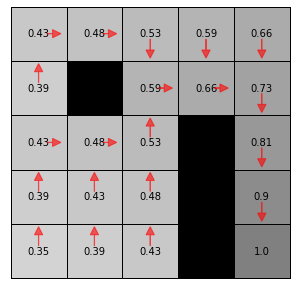

In [6]:
%matplotlib inline
#from ipynb.fs.defs.mdp import maze_mdp # Markov Decision Process
#from ipynb.fs.defs.maze_plotter import maze_plotter # used for visualization of the state value and policy evolution

walls = [6,17,18,19]
height = 5
width = 5
m = maze_mdp(width, height, walls=walls, terminal_states=[height*width-1]) # maze-like MDP definition

[V_list, policy_list] = VI_V(m,render=True)

#### Stochastic version

Step to finish  18


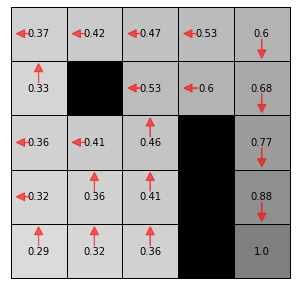

In [7]:
from mdp_stoch_trans import my_maze_mdp
%matplotlib inline
#from ipynb.fs.defs.mdp import maze_mdp # Markov Decision Process
#from ipynb.fs.defs.maze_plotter import maze_plotter # used for visualization of the state value and policy evolution

walls = [6,17,18,19]
height = 5
width = 5
m = my_maze_mdp(width, height, walls=walls, terminal_states=[height*width-1], stochasticity = 0.1) # maze-like MDP definition

[V_list, policy_list] = VI_V(m,render=True)

### Value iteration with the *Q* function

The state-action value function $Q^{\pi}(s,a)$ defines the value of being in state $x$, taking action $u$ then following policy $\pi$. The Bellman Optimality Equation for $Q^*$ is:
    $$ Q^*(x,u) =  r(x,u) + \gamma \sum_{y} P(x,u,y) \max_{u'}Q^*(y,u'). $$ 

By taking inspiration from the VI_V(mdp) function given above, fill the blank (given with '//...') in the code below.
Run in with the cell given just after the VI_Q(mdp) function.


In [8]:
def VI_Q(mdp, render=True): #Value Iteration based on the state-action value Q
    #Same as above, but we save all the computed values in the Q table 
    #(instead of saving only the optimal value of each state), so there is no need for a V_temp list
    Q = np.zeros((mdp.observation_space.size,mdp.action_space.size))
    pol = np.zeros((mdp.observation_space.size))
    quitt = False
    
    Q_list = [Q.copy()] 
    pol_list = [pol.copy()]
    Qmax = Q.max(axis=1)
        
    if render:
        mdp.new_render()

    i=0
    nb_step = 0
    while quitt==False:
        nb_step+=1
        Qold = Q.copy()
        
        if render:
            mdp.render(Q,pol)
        i+=1
        #print("iteration : {}".format(i))
        for x in mdp.observation_space.states :
           # print("x = {}".format(x))
            for u in mdp.action_space.actions :
                #print("u = {}".format(u))
                sum =0
                for y in mdp.observation_space.states:
                    #if i==3 and x>51:
                        #print("y = {}".format(y))
                    uy_opt=0
                    uy_val=0
                    for uy in mdp.action_space.actions :
                    #if i == 3 and x>51:
                           # print("uy = {}".format(uy))
                        if(Qold[y,uy] > uy_val):
                            uy_val = Qold[y,uy]
                            uy_opt = uy
                        
                    sum = sum + mdp.P[x,u,y]*Qold[y,uy_opt]
                
                
                Q[x,u] = mdp.r[x,u]+mdp.gamma*sum
                                
        Qmax = Q.max(axis=1)
        pol =  np.argmax(Q,axis=1)

        Q_list.append(Q.copy())
        pol_list.append(pol)
        
       
        if (np.linalg.norm(Q-Qold)) <= 0.01 :
            quitt = True
    
    if render:
        mdp.render(Q,pol)
    print("Step to finish ", nb_step)    
    return [Q_list, pol_list]

#### Normal version

Step to finish  13


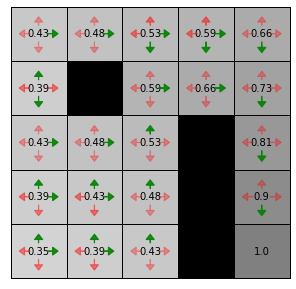

In [9]:
%matplotlib inline
#from ipynb.fs.defs.mdp import maze_mdp # Markov Decision Process
#from ipynb.fs.defs.maze_plotter import maze_plotter # used for visualization of the state value and policy evolution

walls = [6,17,18,19]
height = 5
width = 5
m = maze_mdp(width, height, walls=walls, terminal_states=[height*width-1]) # maze-like MDP definition

[Q_list, policy_list] = VI_Q(m,render=True)

#### Stochastic version

Step to finish  20


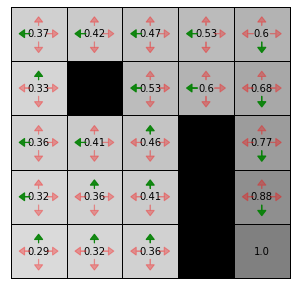

In [10]:
%matplotlib inline
#from ipynb.fs.defs.mdp import maze_mdp # Markov Decision Process
#from ipynb.fs.defs.maze_plotter import maze_plotter # used for visualization of the state value and policy evolution

walls = [6,17,18,19]
height = 5
width = 5
m = my_maze_mdp(width, height, walls=walls, terminal_states=[height*width-1], stochasticity = 0.1) # maze-like MDP definition
[Q_list, policy_list] = VI_Q(m,render=True)

## Policy Iteration

### Policy Iteration with the *Q* function

Given a MDP and a policy $\pi$, policy iteration goes through the following process: 
* Evaluation of the policy $\pi$: computes the state-action value $Q$ based on the policy $\pi$;
* Improvement of the policy $\pi$: computes the new best policy based on the state-action value $Q$.

This process is repeated until convergence is achieved (the policy cannot be improved anymore).

The evaluation process relies on the Bellman Expectation Equation for $Q$ with deterministic policy $\pi$: 
    $$Q^{\pi}(x,u) = r(x,u) + \gamma \sum_{y \in S}P(x,u,y)Q^{\pi}(y,\pi(y)).$$

The policy can then be updated as follows:
    $$\pi^{(t+1)}(x) = \arg\max_uQ^{\pi^{(t)}}(x,u).$$

The box below gives the code of policy iteration with the $Q$ function. Again, have a close look at the code.

* can you find the part where the policy is evaluated, and the part where it is updated? Why do we have to loop twice over states in the former?

In the cell given just after the PI_Q(mdp) function, by taking inspiration of the cell just above, write the code to run it and vizualize it.


In [11]:
import numpy as np

def PI_Q(mdp, render=True): # policy iteration over the Q function
    Q = np.zeros((mdp.observation_space.size,mdp.action_space.size))
    pol = np.zeros(mdp.observation_space.size,dtype=np.int16)
    
    Q_list = [Q.copy()]
    policy_list = [pol.copy()]
    
    quitt = False
    
    if render:
        mdp.new_render()
    
    nb_step=0
    while quitt==False:
        nb_step+=1
        if render:
            mdp.render(Q.max(axis=1),pol)
            
        # Step 1 : Policy Evaluation
        for x in mdp.observation_space.states:
            for u in mdp.action_space.actions:
                if x in mdp.terminal_states:
                    Q[x,u] = mdp.r[x,u]
                else :
                    sum = 0
                    for y in mdp.observation_space.states:
                        sum = sum + mdp.P[x,u,y]*Q[y,pol[y]]
                    Q[x,u] = mdp.r[x,u] + mdp.gamma*sum
        
            
        # Step 2 : Policy Improvement
        pol =  np.argmax(Q,axis=1)         
        
        Q_list.append(Q.copy())
        policy_list.append(pol.copy())
        
        # Check the convergence
        if np.array_equal(Q_list[-1],Q_list[-2]) :
            quitt = True
    
    if render:
            mdp.render(Q.max(axis=1),pol)
            
    print("Step to finish ", nb_step)       
    return [Q_list,policy_list]

Step to finish  12


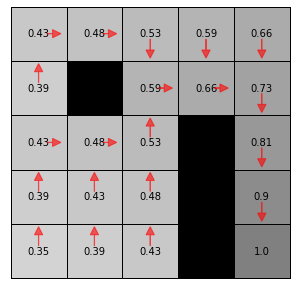

In [12]:
%matplotlib inline
#from ipynb.fs.defs.mdp import maze_mdp # Markov Decision Process
#from ipynb.fs.defs.maze_plotter import maze_plotter # used for visualization of the state value and policy evolution

walls = [6,17,18,19]
height = 5
width = 5
m = maze_mdp(width, height, walls=walls, terminal_states=[height*width-1]) # maze-like MDP definition

[V_list, policy_list] = PI_Q(m,render=True)

### Policy Iteration with the *V* function

By taking inspiration from the PI_Q(mdp) function given above, write a PI_V(mdp) function that implements policy iteration with the *V* function 

In [13]:
def PI_V(mdp, render=True):

    V = np.zeros((len(mdp.observation_space.states)))
    P = np.zeros((len(mdp.observation_space.states)),dtype=np.int16)
    V_list = [V.copy()]
    P_list = [P.copy()]
    
    quitt_policy = False
    if render:
        mdp.new_render()
    nb_step=0
    while quitt_policy==False:
        nb_step+=1
        Pold = P.copy()
        quitt_value = False
        if render:
            mdp.render(V, P)

        while quitt_value==False:
            Vold = V.copy()
            for x in mdp.observation_space.states:
                u = Pold[x]
                if not x in mdp.terminal_states:
                    # Process sum of the values of the neighbouring states
                    sum = 0
                    for y in mdp.observation_space.states:
                        sum = sum + mdp.P[x,u,y]*Vold[y]
                    V[x] = mdp.r[x,u] + mdp.gamma*sum
                else : # if the it is one of the final states, then we only take the rewardinto account
                    V[x] = mdp.r[x,u]
                    
            if (np.linalg.norm(V-Vold)) <= 0.01 :
                quitt_value = True
            
        for x in mdp.observation_space.states:
            if not x in mdp.terminal_states:
                P_x = dict()
                for u in mdp.action_space.actions:
                    sum = 0
                    for y in mdp.observation_space.states:
                        sum = sum + mdp.P[x,u,y]*V[y]
                    P_x[u]=sum
                P[x] = max(P_x, key=P_x.get) #get action with the best weighted values
                            
        if (np.linalg.norm(P-Pold)) <= 0.01 :
            quitt_policy = True

        V_list.append(V.copy())
        P_list.append(P.copy())
    print("Step to finish ", nb_step)
    return V_list, P_list

#### Normal version

Step to finish  10


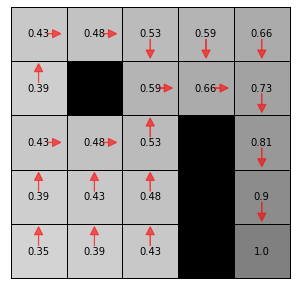

In [14]:
%matplotlib inline
#from ipynb.fs.defs.mdp import maze_mdp # Markov Decision Process
#from ipynb.fs.defs.maze_plotter import maze_plotter # used for visualization of the state value and policy evolution

walls = [6,17,18,19]
height = 5
width = 5
m = maze_mdp(width, height, walls=walls, terminal_states=[height*width-1]) # maze-like MDP definition

[V_list, policy_list] = PI_V(m,render=True)

#### Stochastic version

Step to finish  6


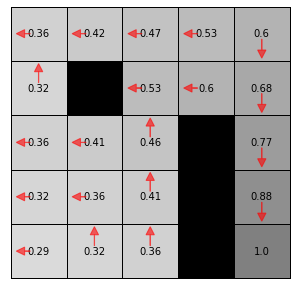

In [15]:
%matplotlib inline
#from ipynb.fs.defs.mdp import maze_mdp # Markov Decision Process
#from ipynb.fs.defs.maze_plotter import maze_plotter # used for visualization of the state value and policy evolution

walls = [6,17,18,19]
height = 5
width = 5
m = my_maze_mdp(width, height, walls=walls, terminal_states=[height*width-1], stochasticity = 0.1) # maze-like MDP definition

[V_list, policy_list] = PI_V(m,render=True)

## Wrapping up

Which of all the above methods converges in fewer steps? To answer the question, add a step counter to the above codes, run them again and print the step counter in the end.

Discuss the relative computational efficiency of these methods.

### Open question

The [*Generalized Policy Iteration*](https://link.springer.com/content/pdf/10.1007/BF00933260.pdf) algorithm draws a continuum between value iteration and policy iteration. Try to implement it and parametrize it to obtain the value iteration regime, the policy iteration regime, and something intermediate.